 2. Dany jest plik call-center.xlsx Zawiera on dane z pewnego call-center. Manager potrzebuje ustalić <b>jaki moment w ciągu dnia jest najlepszy do wykonywania połączeń</b>.
Przeprowadź analizę.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
df = pd.read_excel('./Copy of call-center.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5221 non-null   float64       
 1   phone_num          5221 non-null   float64       
 2   call_type          5221 non-null   object        
 3   staff_id           5221 non-null   float64       
 4   date               5221 non-null   datetime64[ns]
 5   start_time         5221 non-null   object        
 6   handle_time        5221 non-null   float64       
 7   Total_Client_Time  5221 non-null   float64       
 8   Abandon_Time       5221 non-null   float64       
 9   abandon            5221 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 408.0+ KB


In [3]:
df

,id,phone_num,call_type,staff_id,date,start_time,handle_time,Total_Client_Time,Abandon_Time,abandon
0,1.979879e+11,6.696727e+11,Outcoming,19561043.0,2019-06-12,08:30:14,85.0,85.0,0.0,N
1,1.979879e+11,6.686688e+11,Outcoming,19561043.0,2019-06-12,08:32:53,47.0,47.0,0.0,N
2,1.979879e+11,6.696966e+11,Outcoming,19561043.0,2019-06-12,08:34:38,84.0,84.0,0.0,N
3,1.979879e+11,6.692967e+11,Outcoming,20158124.0,2019-06-12,08:36:20,54.0,54.0,0.0,N
4,1.979879e+11,6.692649e+11,Outcoming,19406986.0,2019-06-12,08:36:56,4.0,4.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...
5216,1.978572e+11,6.678092e+11,Outcoming,15331671.0,2019-06-16,17:49:20,2.0,2.0,0.0,N
5217,1.978572e+11,6.696256e+11,Outcoming,15331671.0,2019-06-16,17:49:45,50.0,50.0,0.0,N
5218,1.978572e+11,6.692796e+11,Outcoming,15331671.0,2019-06-16,17:53:57,2.0,2.0,0.0,N
5219,1.978572e+11,6.692070e+11,Outcoming,15331671.0,2019-06-16,17:54:25,12.0,12.0,0.0,N


In [4]:
#połączenie kolumn "date" i "start_time" aby później na jej podstawie wyciągnąć informację 
#o godzinie wykonywania połączeń
df['date'] = df['date'].astype(str) 
df['start_time'] = df['start_time'].astype(str)
df['date_time'] = df['date'] + ' ' + df['start_time']
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df

,id,phone_num,call_type,staff_id,date,start_time,handle_time,Total_Client_Time,Abandon_Time,abandon,date_time,hour
0,1.979879e+11,6.696727e+11,Outcoming,19561043.0,2019-06-12,08:30:14,85.0,85.0,0.0,N,2019-06-12 08:30:14,8
1,1.979879e+11,6.686688e+11,Outcoming,19561043.0,2019-06-12,08:32:53,47.0,47.0,0.0,N,2019-06-12 08:32:53,8
2,1.979879e+11,6.696966e+11,Outcoming,19561043.0,2019-06-12,08:34:38,84.0,84.0,0.0,N,2019-06-12 08:34:38,8
3,1.979879e+11,6.692967e+11,Outcoming,20158124.0,2019-06-12,08:36:20,54.0,54.0,0.0,N,2019-06-12 08:36:20,8
4,1.979879e+11,6.692649e+11,Outcoming,19406986.0,2019-06-12,08:36:56,4.0,4.0,0.0,N,2019-06-12 08:36:56,8
...,...,...,...,...,...,...,...,...,...,...,...,...
5216,1.978572e+11,6.678092e+11,Outcoming,15331671.0,2019-06-16,17:49:20,2.0,2.0,0.0,N,2019-06-16 17:49:20,17
5217,1.978572e+11,6.696256e+11,Outcoming,15331671.0,2019-06-16,17:49:45,50.0,50.0,0.0,N,2019-06-16 17:49:45,17
5218,1.978572e+11,6.692796e+11,Outcoming,15331671.0,2019-06-16,17:53:57,2.0,2.0,0.0,N,2019-06-16 17:53:57,17
5219,1.978572e+11,6.692070e+11,Outcoming,15331671.0,2019-06-16,17:54:25,12.0,12.0,0.0,N,2019-06-16 17:54:25,17


In [8]:
#sprawdzenie zawartości kolumny "call_type" - w celu upewnienia się, czy wszystskie połączenia są wychodzące
df['call_type'].value_counts()

Outcoming    5179
Incoming       42
Name: call_type, dtype: int64

In [5]:
#skoro menagera interesuje wykonywanie połączeń, a kolumna "call type" zawiera poł. wychodzące i przychodzące 
#wybieram tylko te wychodzące
df_outcoming = df.loc[df['call_type']=='Outcoming'] 
df_outcoming['call_type'].describe()

count          5179
unique            1
top       Outcoming
freq           5179
Name: call_type, dtype: object

### W jakich godzinach jest wykonywane najwięcej połączeń?
Pierwszą rzeczą jaką postanowiłam przeanalizować, to to, ile jest wykonywane połączeń w poszczególnych godzinach w ciągu dnia.

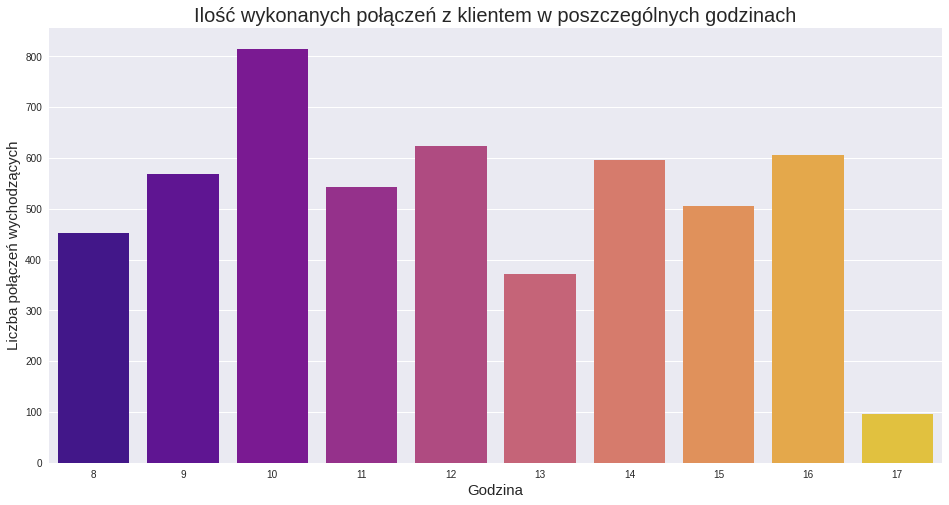

In [10]:
calls_by_hour = df_outcoming.copy()
calls_by_hour = calls_by_hour.groupby(['hour']).count()
calls_by_hour = calls_by_hour.reset_index()
sns.barplot(x='hour',y='Total_Client_Time',data=calls_by_hour, palette ='plasma')
plt.title('Ilość wykonanych połączeń z klientem w poszczególnych godzinach', fontsize=20)
plt.xlabel("Godzina", size=15)
plt.ylabel("Liczba połączeń wychodzących", size=15)
plt.show()

Jak widać na wykresie, najwięcej połączeń było wykonywanych w godzinie 10, później 12, 14, 16, 9 i 11 - ich ilość wydaje się być podobna. Najmniej połączeń była wykonywana o godz. 17. Aby jednak zebrac więcej informacji sprawdzę jeszcze czas rozmów w poszczególnych godzinach. W tabeli są 2 kolumny "handle_time" i "Total_client_time", jednak podsumowując obie funckją describe okazuje się, że nie ma między nimi różnicy, więc do dalszych analiz wykorzystam kolumnę "Total_client_time". Podliczenie wartości w kolumnie "Abandon" nie wskazuje na to, żeby jakiekolwiek połączenie zostało zakończone przed faktyczną rozmową, ale to chyba dotyczy tylko połączeń pezychodzących.

In [15]:
df_outcoming[['handle_time ', 'Total_Client_Time']].describe()

,handle_time,Total_Client_Time
count,5179.000000,5179.000000
mean,58.525005,58.525005
std,97.903391,97.903391
min,0.000000,0.000000
25%,9.000000,9.000000
50%,36.000000,36.000000
75%,64.000000,64.000000
max,1447.000000,1447.000000


In [16]:
df_outcoming['abandon'].value_counts()

N    5179
Name: abandon, dtype: int64

### Średni czas rozmowy z klientem w poszczególnych godzinach

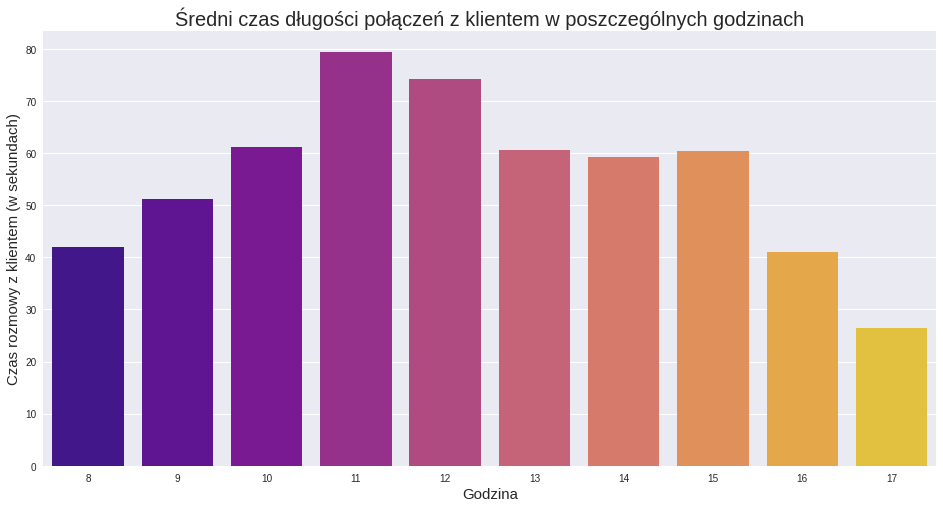

In [17]:
total_client_time_by_hour = df_outcoming.copy()
total_client_time_by_hour = total_client_time_by_hour.groupby(['hour'])['Total_Client_Time'].mean()
total_client_time_by_hour = total_client_time_by_hour.reset_index()
sns.barplot(x='hour',y='Total_Client_Time',data=total_client_time_by_hour, palette ='plasma')
plt.title('Średni czas długości połączeń z klientem w poszczególnych godzinach', fontsize=20)
plt.xlabel("Godzina", size=15)
plt.ylabel("Czas rozmowy z klientem (w sekundach)", size=15)
plt.show()

In [18]:
total_client_time_by_hour.sort_values(by='Total_Client_Time', ascending=False )

,hour,Total_Client_Time
3,11,79.464088
4,12,74.219904
2,10,61.138650
5,13,60.591398
7,15,60.312253
6,14,59.328859
1,9,51.107206
0,8,41.940397
8,16,40.995050
9,17,26.510417


Porównując średnią długość rozmowy (w sekundach) dla konkretnych godzin, wychodzi na to, że średnio najdłużej rozmowy trwały w godzinie 11, 12 - odpowiednio 79,5 i 74 sekundy. W pozostałych godzinach czas był podobny. Najkrótsze rozmowy odnotowane zostały w godzinie 17.

### Łączny czas połączeń dla poszczególnych godzin
Jako, że średni czas połączeń może być nie końca miarodajny, postanowiłam podliczyć jeszcze łączny czas spędzony na rozmowach wychodzących w poszczególnych godzinach. 

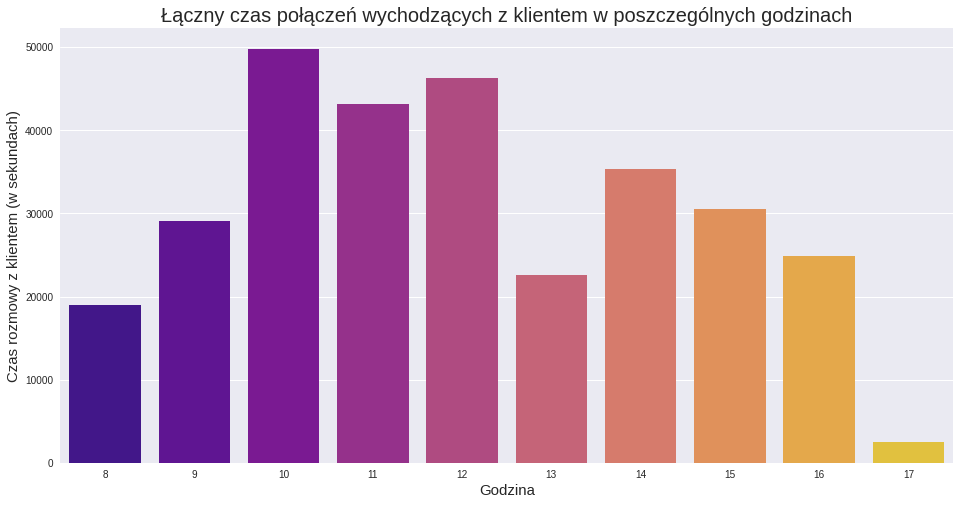

In [19]:
total_client_time_by_hour = df_outcoming.copy()
total_client_time_by_hour = total_client_time_by_hour.groupby(['hour'])['Total_Client_Time'].sum()
total_client_time_by_hour = total_client_time_by_hour.reset_index()
sns.barplot(x='hour',y='Total_Client_Time',data=total_client_time_by_hour, palette ='plasma')
plt.title('Łączny czas połączeń wychodzących z klientem w poszczególnych godzinach', fontsize=20)
plt.xlabel("Godzina", size=15)
plt.ylabel("Czas rozmowy z klientem (w sekundach)", size=15)
plt.show()

In [20]:
total_client_time_by_hour.sort_values(by='Total_Client_Time', ascending=False)

,hour,Total_Client_Time
2,10,49828.0
4,12,46239.0
3,11,43149.0
6,14,35360.0
7,15,30518.0
1,9,29080.0
8,16,24843.0
5,13,22540.0
0,8,18999.0
9,17,2545.0


Z wykresu i tabeli możemy wywnioskować, że najwięcej czasu na rozmowach wychodzących pracownicy spędzili w godzinach 10 (łącznie 49 828s), 12 (łącznie 46 239s) i 11 (43 149).

Odpowiadając na pytanie z zadania, jaki moment w ciągu dnia jest najlepszy do wykonywania połączeń, określmy co dla mnie mówi o tym, że moment na wykonanie połączenia był dobry - powiedziałabym, że to moment, kiedy awkonuje się dużo połączeń i jednocześnie trwają one dłużej niż w innych porach dnia, a więc z przeanalizowanych przeze mnie danych są to godziny 10-12.